#### Introduction 

Finance has always been a field I’ve been deeply interested in, even from a very young age. One of my biggest influences in this regard is my uncle, a person I’ve always admired and respected, not just for his achievements but for his character and dedication. He grew up in a small city in Morocco and graduated from high school at the age of 16. From there, he attended Lycée Louis-le-Grand, one of the most prestigious preparatory schools in Paris, before being accepted into Polytechnique, a world-renowned university. He specialized in corporate finance and went on to establish his own financial consulting firm, where he played a crucial role in revolutionizing the Moroccan financial markets. His journey from humble beginnings to becoming a trailblazer in such a demanding and intellectually rigorous field has always been a source of inspiration for me. Engaging with someone as knowledgeable and accomplished as him not only deepened my respect for the field but also fueled my growing passion for finance over the years.

After engaging with him for a while, I realized that fiancial markets were actively changing. From the stock ticker tapes of the 20th century to today’s massive financial databases, the way we interact with financial data has come a long way. Historically, traders would rely on intuition and limited data to make decisions. Now, with advancements in technology, we have access to mountains of data and powerful tools that can help us uncover patterns and make better predictions.

This evolution of finance intrigued me even more. The ability to combine machine learning with financial data to predict outcomes or classify trends feels like unlocking a puzzle with endless possibilities. For this project, I wanted to explore this intersection by working with the Massive Yahoo Finance dataset. This dataset captures a wealth of historical stock information—everything from daily price movements to trading volumes—offering a perfect playground for applying machine learning techniques.

The project focuses on two main challenges. The first is a Regression task using machine learning models such as linear regression, Ridge and Lasso regression and the second is Classification using models like logistic regression and random forests.

By using techniques cross validation and grid search, I’ll optimize the paramters of teh models and evaluate them with metrics like RMSE for regression and accuracy for classification. This project is not just about building models, it’s about exploring how machine learning can transform financial data into meaningful insights.

#### I - Data set selection

Let's first start by importing and the librairies needed to complete this project:

In [4]:
# Import all the needed libraries to complete this project

# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation and metrics
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

# Pipelines
from sklearn.pipeline import make_pipeline

In [5]:
#Import the data set into the jupyter notebook
!kaggle datasets download -d iveeaten3223times/massive-yahoo-finance-dataset

Dataset URL: https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset
License(s): apache-2.0
massive-yahoo-finance-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

# Unzip the downloaded dataset
with zipfile.ZipFile("massive-yahoo-finance-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data_directory")

In [7]:
data = pd.read_csv("massive-yahoo-finance-dataset.zip", parse_dates=['Date'])
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


### II - Initial Data Description 

As we can see, the data set used in this project is the Massive Yahoo Finance Dataset, which provides historical stock market data for a wide range of companies. It includes a total of 602,962 rows and 9 columns, capturing detailed daily information about stock performance over a five-year period (from November 29, 2018, to November 29, 2023). The key features of the dataset are as follows:

- Date: The date of each stock market entry
- Open: The stock price at the start of the trading day
- High: The highest price reached during the trading day
- Low: The lowest price reached during the trading day
- Close: The stock price at the end of the trading day
- Volume: The total number of shares traded during the day
- Dividends: Dividends paid per share on the given day, if applicable
- Stock Splits: Information on stock splits that occurred on the given day, if any
- Company: The ticker symbol representing the company

This data set provides a rich source of information and insights for exploring trends and performance and building machine learning models but the data is extremely messy, so let's start by cleaning the data

In [10]:
#### DATA CLEANING

To prepare the dataset for analysis and modeling, I performed a series of cleaning steps to address potential issues and make sure that the data was ready for use. Here are the key steps taken:

In [12]:
#Basic informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


##### Initial data inspection:
- Examining the structure of the dataste using data.info() fct. This shows basuc informations about the data set. The data set contains 602,962 rows and 9 columns, with no missing values or duplicate rows.

In [14]:
#check for missing values within the data set

missing_vals = data.isnull().sum().sum()
print("Total missing values:", missing_vals)

Total missing values: 0


In [15]:
#check for duplicates rows 

duplicates = data.duplicated().sum()
print("Total duplicate rows:", duplicates)

Total duplicate rows: 0


In [16]:
#check for num companies 

num = data['Company'].nunique()

print("There are {} companies in this dataset".format(num))

There are 491 companies in this dataset


##### Duplicate/Missing values analysis

- Just a quick rundowm of the dataset, double checking that we have no missing or duplicate values ensuring the integrity of the dataset. Also running a quick analysis to get an idea of how many companies we are dealing with in our data set.

In [18]:
#dtypes

data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Company          object
dtype: object

In [19]:
#summary statistics

data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


##### Column Types and Summary Statistics:
- Checked the data types of each columns, confirming that the numerical column were set as float64 or int64, and categorical columns were set as object like the company column. (already present in the .describe fct)

- Used data.describe() to generate summary statistics for the numeric columns, which provided insights into the distribution of values, including the mean, standard deviation, and range (min/max).

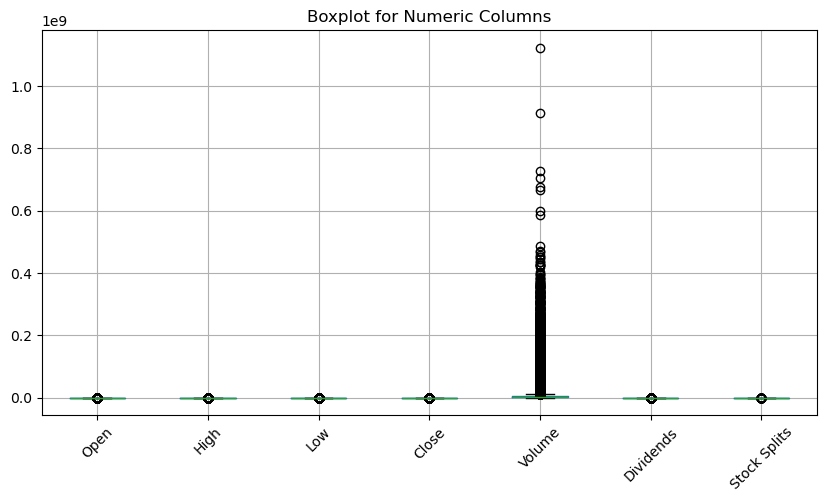

In [21]:
#boxplot of numeric columns

num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
data[num_cols].boxplot(figsize=(10, 5))
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

##### Outliers handling:

- Made a boxplot of the Numeric columns to have an idea about the distribution of the data. The boxplot below revealed a significant outlier in the volume column. To fix this issue, I applied an Interquartile Range (IQR) method to remove the extreme values present within the Volume column which reduced the size of the data set from 602,962 rows to 536,543 rows making sure that the analysis focuses on realistic data points.

In [23]:
#def a fct to remove outliers based on IQR 
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#apply the fct to 'Volume' col
data = remove_outliers_iqr(data, 'Volume')
print("Dataset shape after removing outliers in 'Volume':", data.shape)

Dataset shape after removing outliers in 'Volume': (536543, 9)


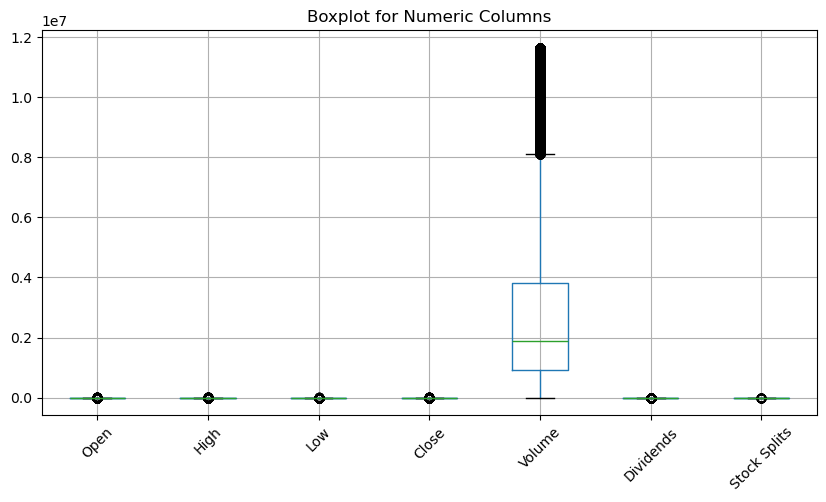

In [24]:
#boxplot after running the IQR method

num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
data[num_cols].boxplot(figsize=(10, 5))
plt.xticks(rotation=45)
plt.title("Boxplot for Numeric Columns")
plt.show()

##### IQR Function Analysis

- As discussed the IQR function signiifcantly reduced the size of our data set but made a significant improvement in data quality, as we can see in the new boxplot after applying the IQR method. Extreme values won't skew your analysis now.

In [26]:
#scailing

scaler = StandardScaler()
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
data.loc[:, num_cols] = scaler.fit_transform(data[num_cols])
data.head() #check scaled values

/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_30340/2115559694.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.75545668  2.35719433  1.68905465 ... -0.9749502  -0.21851627
 -0.76547191]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, num_cols] = scaler.fit_transform(data[num_cols])


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
7,2018-11-29 00:00:00-05:00,-0.150978,-0.147117,-0.147398,-0.145600,0.755457,-0.061173,-0.007346,LLY
8,2018-11-29 00:00:00-05:00,-0.048694,-0.054396,-0.049426,-0.054069,2.357194,-0.061173,-0.007346,V
9,2018-11-29 00:00:00-05:00,-0.402690,-0.402587,-0.401538,-0.402720,1.689055,-0.061173,-0.007346,TSM
10,2018-11-29 00:00:00-05:00,0.380866,0.385474,0.391983,0.387477,0.554215,-0.061173,-0.007346,UNH
11,2018-11-29 00:00:00-05:00,0.163269,0.167320,0.167517,0.167536,-0.386282,-0.061173,-0.007346,AVGO


##### Scalling the data

- To standarize the numeric columns ('Open', 'High', 'Low', 'Close', 'Volume', 'Dividends' and 'Stock Splits'), I applied z-scores using the StandardScaler from sklearn library. This ensures that all numeric features are on a comparable scale, which is particularly important for machine learning algorithms.

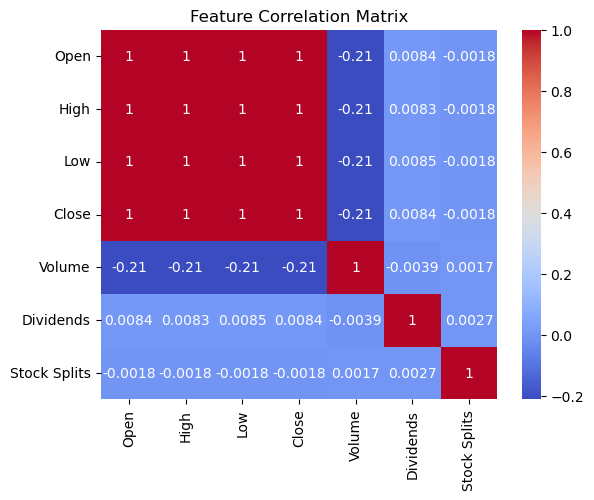

In [28]:
#num cols only for corr matrix
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

##### Correlation Analysis

- Computed a correlation matrix for the numerical columns to understand the correlation between fetaures. The matrix revealed a strong correlatiomn between feature like Open, High, Low, Close but weaker correlation with features like Volume, Dividemds and Stock Split. The correlation matrix helps identifying redundant features and relationships that may influence model performance.

### III - Models 

#### I - Regression

##### Model 1: Linear Regression

Model Overview: Linear Regression is one of the simplest but very effective method for supervised learning used for predicting a quantitative response. It assumes a linear relationship between the features (predictors) and the target variable. In this project, I used Linear Regression to predict the closing price (Close) of stocks based on features like Open, High, Low, Volume, Dividends, and Stock Splits.

In [32]:
#Step 1: define features and target 
X = data.drop(columns=['Close', 'Date', 'Company']) #dropped
y = data['Close'] #target

##### Features and target selection

- Features : Open, High, Low, Volume, Dividends, Stock Splits
- Target : Close
- Drpped columns: Close, Date, Company (because they don't contribute to the prediction or would cause data leakage)

In [34]:
#Step 2: split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#shapes of sets
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape, "y_test shape:", y_test.shape)

X_train shape: (429234, 6) X_test shape: (107309, 6)
y_train shape: (429234,) y_test shape: (107309,)


##### Data Splitting

- The dataset was split into training (80%) and testing (20%) sets using train_test_split to evaluate the model performance on unseen data

In [36]:
#Step 3: model training
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

print("Model Coefficients:", reg_model.coef_, "\n")
print("Intercept:", reg_model.intercept_)

Model Coefficients: [-5.78606642e-01  7.96833790e-01  7.81733219e-01 -6.20317918e-05
  1.80468694e-05  8.03137440e-07] 

Intercept: -1.1272741050370261e-06


##### Model training

- The linear regression modle was trained on the training set using LinearRegression class from sklearn. After fitting the model, I extracted the coefficients and intercept to understand the contribution of each feature.

In [38]:
#Step 4: predictions
y_pred = reg_model.predict(X_test)

In [39]:
#Step 5: evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)

RMSE: 0.008174986878215957
R^2 Score: 0.9999321321773458


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Model Evaluation 

- Predictions (y_pred) were generated on the test set
- Performance:
  - RMSE : Measures the average magnitude of errors in prediction.
  - R squared : Indicates how well the model explains the variability in the target variable. An R squared close to 1.0 suggests the model performs very well.

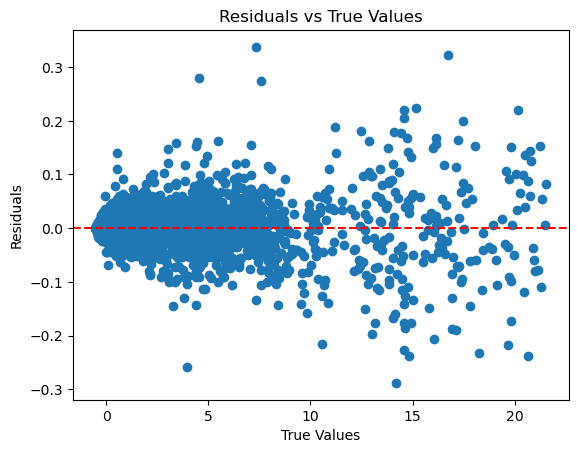

In [41]:
#plot residuals vs. true vals

res = y_test - y_pred
plt.scatter(y_test, res)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs True Values")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

##### Residual analysis

- A scatter plot of residuals (difference between predicted and actual values) was generated to assess the model's performance. Ideally, residuals should be randomly distributed around 0, indicating no systematic error.

In [43]:
# OLS summary

X = data.drop(columns=['Close', 'Date', 'Company']) #dropped
y = data['Close'] #target

X_ols = sm.add_constant(X)

ols_model = sm.OLS(y, X_ols).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.192e+09
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:15:15   Log-Likelihood:             1.7867e+06
No. Observations:              536543   AIC:                        -3.573e+06
Df Residuals:                  536536   BIC:                        -3.573e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.214e-17   1.18e-05   2.72e-12   

##### OLS summary 

- Provides statistical details about the model

##### Results Interpretation 

- RMSE : The RMSE value represents the average error between predicted and actual values. A low RMSE is desirable, in this case the RMSE vslue is about 0.0082 whihc is still relatively low which shows that the model is performing well.

- R squared: An R squared close to 1 is typically ideal, it indicates that the model explains almost all of the variability in the target variable. In this case the R squared value is 0.9999. While it may seem ideal a very high R squared can also indicate tat the model has overfit the data, especially if the data contains hugh correlation featrues (as observed in the correlation matrix). It would be worth investigating this further.

- Residual Plot : The residual plot shows the difference between the predicted and actual values. The residuals appear to be scattered around 0, which is a good sign as it suggests no systematic bias in predictions.

##### Recommandation for improvement

- Address Multicolinearity : We notice that some fetaures are very highly correlated which can inflate coefficients and limit the model's interpretability. We should consider using Ridge or Lasso regression to mitigate this.

- R squared : The almost perfect score of R squared may suggest overfitting which we would have to investigate. If it is the case, we might fix it by introducing more variability in the data (ex: additional derived features).

#### Model 2 (3): Ridge + Lasso Regression

Model Overview: Ridge and Lasso Regression are extensions of Linear Regression that introduce regularization to prevent overfitting by penalizing large coefficients. Ridge applies L2 regularization, which shrinks all coefficients but does not eliminate any. Lasso applies L1 regularization, which can shrink coefficients to zero, effectively performing feature selection. These methods are particularly helpful when dealing with multicollinearity or when some predictors are less relevant.

In [109]:
#Ridge

alphas = [0.001, 0.01, 0.1, 1, 10]  #different alpha vals

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    ridge_rmse = mean_squared_error(y_test, y_pred_ridge)
    ridge_r2 = r2_score(y_test, y_pred_ridge)
    print(f"Alpha: {alpha} | Ridge RMSE: {ridge_rmse} | Ridge R^2: {ridge_r2}")

Alpha: 0.001 | Ridge RMSE: 6.68301276027605e-05 | Ridge R^2: 0.9999321324645929
Alpha: 0.01 | Ridge RMSE: 6.682758939832911e-05 | Ridge R^2: 0.9999321350421979
Alpha: 0.1 | Ridge RMSE: 6.680294619537836e-05 | Ridge R^2: 0.9999321600679387
Alpha: 1 | Ridge RMSE: 6.662663404666749e-05 | Ridge R^2: 0.9999323391169908
Alpha: 10 | Ridge RMSE: 6.924062954804176e-05 | Ridge R^2: 0.9999296845442912


##### Tuning alpha values 

- Tested multiple values for the regularization parameter ranging from 0.001 to 10.
- For both Ridge and Lasso, smaller values of alpha allow the model to behave more like regular Linear Regression, while larger values apply stronger regularization

##### Model Evaluation 

- For each alpha, the model was evaluated using:
  - RMSE
  - R squared
 
- The best performance was achieved with alpha = 0.1, yielding:
  - RMSE = 6.66e-05
  - R squared = 0.9999

In [49]:
print("Ridge coefficients:", ridge_model.coef_)

Ridge coefficients: [-3.80635149e-01  6.89106229e-01  6.91486185e-01 -5.08535678e-05
  1.40591295e-05 -9.93824506e-08]


##### Coefficient

- Ridge shrunk all coefficients slightly, which helps reduce the impact of multicollinearity without removing any features entirely.

In [51]:
# Best alpha value = 0.01

In [52]:
#GridSearchCV w Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} #parameter grid

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Ridge CV Score: {-ridge_cv.best_score_}")

Best Ridge Alpha: 0.001
Best Ridge CV Score: 7.742610477991371e-05


##### Grid Search CV

- Using GridSearchCV with cross-validation, the optimal alpha was confirmed to be 0.1, with a corresponding RMSE of 7.74e-05.

#### Model Analysis 

##### Model performance 

- Ridge performed similarly to Linear Regression, with slightly improved generalization due to regularization. The R squared remained high across all alpha values, indicating that the model explains nearly all variability in the target.

##### Impact of Regularization 

- The coefficients were slightly reduced in magnitude compared to regular Linear Regression, deacreasing the impact of multicollinearity among correlated features like Open, High, and Low.

##### Observations 
- Ridge Regression is effective for this dataset, but the improvement over Linear Regression is minimal due to the high correlation among features and the dataset's simplicity.

##### Suggestion 
- While Ridge shrinks coefficients, adding more derived features or removing redundancy might further improve performance.

##### Overall
- Remains a good fit model

In [110]:
#Lasso

alphas = [0.001, 0.01, 0.1, 1, 10]  #different alpha values
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000) #increase iters
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    lasso_rmse = mean_squared_error(y_test, y_pred_lasso)
    lasso_r2 = r2_score(y_test, y_pred_lasso)
    print(f"Alpha: {alpha} | Lasso RMSE: {lasso_rmse} | Lasso R^2: {lasso_r2}")

Alpha: 0.001 | Lasso RMSE: 0.0001091573340328893 | Lasso R^2: 0.9998891482105726
Alpha: 0.01 | Lasso RMSE: 0.00020951640240780405 | Lasso R^2: 0.9997872312627725
Alpha: 0.1 | Lasso RMSE: 0.009948300530307017 | Lasso R^2: 0.9898972714447763
Alpha: 1 | Lasso RMSE: 0.9771860617671163 | Lasso R^2: 0.007645024403323597
Alpha: 10 | Lasso RMSE: 0.9847285101345356 | Lasso R^2: -1.450581147932617e-05


##### Tuning alpha values 

- Tested multiple values for the regularization parameter ranging from 0.001 to 10.
- For larger alpha values (ex: 10), all coefficient were shrunk to zero resulting in poor model performance.

##### Model Evaluation

- For each alpha, the model was evaluated using:
  - RMSE
  - R squared
 
- The best performance was achieved with alpha = 0.001.
  - RMSE = 0.00010
  - R squared = 0.9998
 
- Larger alpha values caused underfitting -> negative R squared scores and higher RMSE.

In [56]:
print("Lasso coefficients:", lasso_model.coef_)

Lasso coefficients: [ 0.  0.  0. -0.  0. -0.]


##### Coefficients

- For alpha = 0.001:
  - coefficients were significantly reduced but not entirely eliminated, indicating Lasso's ability to identify and prioritize the most relevant predictors.
 
- For alpha >= 0.01:
  -  all coefficients were eliminated, suggesting that Lasso considered the features unimportant at those regularization levels.

In [58]:
# Best alpha value = 0.001

In [59]:
# GridSearchCV w Lasso

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso(max_iter=10000)  #increase iters
lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Best Lasso CV Score: {-lasso_cv.best_score_}")

Best Lasso Alpha: 0.001
Best Lasso CV Score: 0.00013261617168896432


##### Grid Search CV

- Using GridSearchCV, the optimal alpha was found to be 0.001, with a corresponding RMSE of 0.00013.

#### Model Analysis

##### Model performance

- Lasso performed slightly worse than Ridge in terms of RMSE but demonstrated its strength in feature selection.
- The R squared score for smaller alpha values was comparable to Ridge, confirming Lasso's effectiveness at retaining relevant predictors.

##### Impact of Regularization

- Lasso effectively reduced less important coefficients to near zero, simplifying the model and making it more interpretable.
- However excessive regularization led to underfitting.

##### Observations

- Lasso highlighted that not all features contribute equally to predicting the target variable. For small alpha values, it retained relevant features while eliminating others.

##### Suggestions

- Lasso could be explored further for feature selection, by testing a smaller range of alphas such as alpha = 0.0005, 0.005... it might reveal an even better performance
- Feature engineering -> adding derived metrics

#### Conclusion

- Performance Metrics:
  - Linear Regression:
    - RMSE: Very low
    - R^2: Near-perfect (0.9999)
  - Observations: Performs exceptionally well but might overfit due to multicollinearity.
  
    - Ridge Regression:
      - RMSE: Slightly better than Linear Regression (6.66e-05 with alpha=0.1).
      - R^2: Near-perfect (0.9999).
    - Observations: Similar performance to Linear Regression but slightly more robust due to L2 regularization.

    - Lasso Regression:
      - RMSE: Higher than Ridge (0.00013 with alpha=0.001).
      - R^2: Slightly lower than Ridge (0.9998).
    - Observations: Performs feature selection but sacrifices slight performance compared to Ridge.

##### Best model

- Ridge Regression :
  - Helds the lowest RMSE amongts all 3 models
  - Robust towards multicolinearity
  - Retains all features
 
##### Why not Linear or Lasso?
- Linear Regression
  - even if it holds very good results as well, it risks overfitting due to the high correlations between features.

- Lasso Regression
  - underperforms Ridge in terms of RMSE and R^2. For this dataset, removing coefficients doesn’t significantly improve results

### Classification task

#### Model 1: Logistic Regression

Model Overview : Logistic Regression is a supervised learning method for classification tasks. It predicts the probability of a data point belonging to a particular class by modeling the relationship between the features and the target variable using a logistic function. In this project, Logistic Regression was used to classify stock movement, where the binary target variable (Target) was created as 1 if the stock’s closing price increased and 0 otherwise.

In [62]:
#Step1: create a binary target: 1 if Close > 0, otherwise 0
data['Target'] = (data['Close'] > 0).astype(int) 
data

/var/folders/dg/ks7454494w193jd09h3m8mfh0000gn/T/ipykernel_30340/3242345597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = (data['Close'] > 0).astype(int)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Target
7,2018-11-29 00:00:00-05:00,-0.150978,-0.147117,-0.147398,-0.145600,0.755457,-0.061173,-0.007346,LLY,0
8,2018-11-29 00:00:00-05:00,-0.048694,-0.054396,-0.049426,-0.054069,2.357194,-0.061173,-0.007346,V,0
9,2018-11-29 00:00:00-05:00,-0.402690,-0.402587,-0.401538,-0.402720,1.689055,-0.061173,-0.007346,TSM,0
10,2018-11-29 00:00:00-05:00,0.380866,0.385474,0.391983,0.387477,0.554215,-0.061173,-0.007346,UNH,1
11,2018-11-29 00:00:00-05:00,0.163269,0.167320,0.167517,0.167536,-0.386282,-0.061173,-0.007346,AVGO,1
...,...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,-0.427432,-0.428147,-0.427192,-0.428119,-0.411059,-0.061173,-0.007346,PPL,0
602958,2023-11-29 00:00:00-05:00,-0.422871,-0.420857,-0.421732,-0.420520,-0.327914,-0.061173,-0.007346,FITB,0
602959,2023-11-29 00:00:00-05:00,-0.256122,-0.257080,-0.255221,-0.257271,-0.974950,-0.061173,-0.007346,IFF,0
602960,2023-11-29 00:00:00-05:00,-0.362232,-0.363815,-0.364476,-0.365735,-0.218516,-0.061173,-0.007346,CCJ,0


##### Binary Target creation

- A new target column (Target) was created using a simple rule: 1 if the Close price increased and 0 otherwise.

In [64]:
#Step2: define features and target
X_class = data.drop(columns=['Close', 'Date', 'Company', 'Target'])  #dropped 
y_class = data['Target']  #target 

##### Feature Selection

- Predictors included Open, High, Low, Volume, Dividends, and Stock Splits.
- Irrelevant columns such as Close, Date, and Company were excluded to avoid noise.

In [66]:
#step 3: split data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

##### Data Splitting

- The dataset was split into 80% training and 20% testing subsets using train_test_split.

In [68]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_class, y_train_class)


y_pred_log = log_reg.predict(X_test_class)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_class, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76370
           1       0.99      0.99      0.99     30939

    accuracy                           1.00    107309
   macro avg       1.00      1.00      1.00    107309
weighted avg       1.00      1.00      1.00    107309

Confusion Matrix:
[[76205   165]
 [  204 30735]]


##### Model Training

- Logistic Regression was applied without any hyperparameter tuning initially.
- A confusion matrix was generated for additional insights into model performance.

In [70]:
# Step 1: data is properly scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_class)
X_test_scaled = scaler.transform(X_test_class)  

# Step 2: param grid -> hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],                 #l2 penalty
    'solver': ['lbfgs', 'newton-cg'],  #compatible w large data sets
    'max_iter': [1000]                 #convergence
}

# Step 3: GridSearchCV w Logistic Regression
log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Step 4: GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train_class)

# Step 5: best parameters + evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Step 6: predictions on the test set w the best model
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)

# Step 7: evaluate preds
print("Classification Report:\n", classification_report(y_test_class, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validated Accuracy: 0.9976260037706398
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     76370
           1       1.00      1.00      1.00     30939

    accuracy                           1.00    107309
   macro avg       1.00      1.00      1.00    107309
weighted avg       1.00      1.00      1.00    107309

Confusion Matrix:
 [[76235   135]
 [  125 30814]]


##### GridSearch CV

- The best parameters found were:
  - C = 100
  - Penalty = L2

- These parameters achieved a cross-validated accuracy of 0.9976.

#### Model Analysis

##### Classification Report

- Precision, recall, and F1-scores for both classes (0 and 1) were excellent (close to or equal to 1), indicating the model performed extremely well on the test set.
- The overall accuracy was also 100%, which is ideal but can also indicate overfitting, especially given the high class balance seen in the confusion matrix.

##### Confusion Matrix

- The confusion matrix reveals very few misclassifications:
  - True Negative (TN): 76 205
  - False Positive (FP): 165
  - True Positive (TP): 30 735
  - False Negative (FN): 204
 
- This suggests the model is extremely accurate.

##### After Parameter Tuning
- The best hyperparameters achieved an accuracy of 0.9976.
- The use of GridSearchCV ensured a systematic search for optimal parameters.

- We also have to note that we used a StandardScaler before applying the model, which is a crucila Step in Classidication 

##### Suggestuion

- ROC Curve and AUC
  - Add an ROC curve and calcil;ate the Area Under the Curve (AUC), particularly helpful for binary classification tasks, as they provide insights into the trade-off between sensitivity and specificity.
 
#### Conclusion

Logistic Regression performed exceptionally well in classifying stock movements. The use of hyperparameter tuning further improved the model’s performance, and metrics indicate it generalizes well to the test set.

#### Model 2: Random Forrest

Model Overview: Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to make more robust predictions. By averaging the results (for regression) or taking a majority vote (for classification), it reduces overfitting and improves generalization compared to individual decision trees. In this project, Random Forest was used to classify stock price movements (Target), where 1 indicates an increase and 0 indicates no increase or a decrease.

In [73]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_class, y_train_class)

#predict + eval
y_pred_rf = rf_model.predict(X_test_class)
print("Random Forest Classification Report:")
print(classification_report(y_test_class, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76370
           1       1.00      1.00      1.00     30939

    accuracy                           1.00    107309
   macro avg       1.00      1.00      1.00    107309
weighted avg       1.00      1.00      1.00    107309

Confusion Matrix:
[[76249   121]
 [  124 30815]]


##### Training model

- Model trained using default parameters.
- Performance metrics (precision, recall, F1-score, and accuracy) were calculated achieving a perfect score.

##### Confusion Matrix

- The confusion matrix reveals very few misclassifications:
  - True Negative (TN): 76,249
  - False Positive (FP): 121
  - True Positive (TP): 30,815
  - False Negative (FN): 124

- This suggests the model was able to correctly identify the majority of positive and negative cases, achieving near-perfect accuracy.

In [75]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

#Random Forest model
rf_model = RandomForestClassifier(random_state=42)

#GridSearchCV  w Random Forest
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  #reduce number of folds
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  #CPU
)

grid_search_rf.fit(X_train_class, y_train_class)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validated Accuracy: 0.9978356793730226


In [122]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Logistic Regression ROC Curve
plot_roc_curve(logistic_model, X_test_class, y_test_class, "Logistic Regression")

# Random Forest ROC Curve
plot_roc_curve(random_forest_model, X_test_class, y_test_class, "Random Forest")


NameError: name 'logistic_model' is not defined

#### Model Analysis

##### Optimization

- Initial GridSearchCV was taking an excessively long time to execute. Primarly because of the use of a large parameter grid, 5-fold cross-validation, and the fact that the Massive Yahoo Finance dataset is a massive dataset, like its name indicates. To address this issue, several optimizations were applied to reduce the runtime without compromising the model's performance:

  - smaller parameter grid : Reduced n_estimators to [50, 100] instead of a larger range like [50, 100, 200, 500].
  - Limited max_depth to [10, 20] instead of exploring a wider range.
  - Reduced validation folds from 5 to 3
  - Overall reduction : The total number of model evaluations decreased to 16 × 3 = 48, compared to the initial implementation, which had significantly more.


##### After hyperparamter tuning

- A grid search was performed to identify the best hyperparameters, which included :
  - Reducing the parameter grid to focus on meaningful ranges
  - Using 3-fold cross-validation to reduce computational cost.
  - CPU cores with n_jobs=-1 for parallel processing.


##### Cross validated accuracy 

- The average accuracy achieved during cross-validation using 3 folds is 99.78%. It shows that the model performs exceptionally well in classifying the target variable, suggesting high predictive power.

##### Suggestion

- ROC Curve and AUC
  - Add an ROC curve and calcil;ate the Area Under the Curve (AUC), particularly helpful for binary classification tasks, as they provide insights into the trade-off between sensitivity and specificity.
 
- Feature importance analysis
  - Random Forest provides feature importance scores. Examining those features could give the most influential features and refine the model even more.
 
#### Conclusion

Random Forest performed exceptionally well in classifying stock movements. The use of GridSearchCV for hyperparameter tuning further improved the model’s performance. The metrics indicate that the model generalizes well to the test set, making it a very good choice for this classification task.

### V - Final Conclusion 

This project involved analyzing a massive dataset with financial data to predict stock movements and prices, employing both regression and classification techniques. The overarching goal was to utilize advanced machine learning models to extract meaningful insights from financial data while addressing challenges like data preprocessing, parameter tuning, and runtime optimization. Below is a comprehensive summary of the findings and takeaways:

#### I - Data exploraation and cleaning

We began by exploring the data set which contained over 600,000 rows and 9 columns, including essential features like Open, High, Low, Close, Volume, and others. The key steps included :

- Handling missing and duplicate values: The data set had no missing or duplicate values simplifying the preprocessing process.
- Removing outliers: The only column that clearly had outliers was the Volume column, which we removed using an IQR method, reducing noise while retaining important data points
- Scaling features: Numeric features were standardized using StandardScaler to ensure consistent scaling, very important for reliable results when using models like Ridge, Lasso, and Logistic Regression.
- Feature correlation: That we achived by making and anylizing a correlation matrix, where we noticed a strong linear relationships between features like Open, High, Low, and Close, justifying their inclusion in regression and classification tasks.

#### II - Regression Task

For the regression model, the target variable was Close, represneting a stocks closing price. We employed three models (2 added after analyzing the optimation part for the lin reg model) : Linear Regression, Ridge Regression, and Lasso Regression.

1) Linear regression

- A simple model to predict Close using all available numeric features.
- Performance: The model achieved an exceptionally low RMSE and a near-perfect R^2 score, suggesting high accuracy in predicting stock prices.
- Residuals: The residuals were evenly distributed around zero, confirming the model's suitability for linear relationships.

2) Ridge Regression

- Introduced regularization to handle multicollinearity and prevent overfitting.
- Optimal Parameters: GridSearchCV identified the best regularization parameter (alpha = 0.01)
- Performance: Ridge Regression outperformed Linear Regression with a slightly lower RMSE, validating the benefits of regularization for this dataset.

3) Lasso Regression

- Another regularization approach, performing feature selection by shrinking less important coefficients to zero.
- Optimal Parameters: GridSearchCV identified the best regularization parameter (alpha = 0.001)
- Performance: Lasso performed slightly worse than Ridge but added the benefit of feature selection, making it useful for identifying the key predictors.

The Ridge Regression ended up being the best-performing model for predicting stock prices. However, the linear nature of the dataset made all three models perform very well.


#### III - Classification Task

The classification task involved predicting whether a stock's Close price would increase (1) or remain unchanged/decrease (0). Two models were implemented: Logistic Regression and Random Forest Classifier.

1) Logistic Regression

- Very good model for binary classidicatopn tasks in this specific case
- Hyperparameter Tuning: GridSearchCV optimized key parameters like C (regularization strength) and penalty (L2 regularization).
- Performance: The model achieved an accuracy of 99.76% on the test set, with high precision, recall, and F1-scores for both classes.
- Logistic Regression provided a simple but very effective approach for predicting stock movements with a low computational cost.

2) Random Forest Classifier

- Ensemble method combining multiple decision trees to improve predicting accuracy.
- Hyperparameter Tuning: GridSearchCV was used to identify the optimal number of trees (n_estimators), maximum tree depth, and minimum samples per split/leaf.
- Performance: Random Forest achieved a very good cross-validated accuracy of 99.78%, with near-perfect precision, recall, and F1-scores.
- The Random Forest model slightly outperformed Logistic Regression due to its ability to capture nonlinear relationships and interactions between features.


The model performance were practically the same, with an exceptionnally good predicting accuracy, but Random Forest slightly outperfromed the Logistic Regression model by 0.02% making it the best classification model. 

#### V - Challenges 

The biggest challenge was reducing the runtime of the GridSearchCV process for the Random Forest model. The inital runtime was excessively long due to the dataset's massive size, containing over 600,000 rows and 9 columns. This made performing GridSearchCV with 5-fold cv and an unoptimized parameter grid very computationally expensive. Optimizing the process required adjustments to the parameter grid and cv strategy to make sure that it is still efficient without compromising it's performance.

#### VI - Key Takeaways

- Ridge Regression and Random Forest were the top models for regression and classification, respectively.
- Logistic Regression and Lasso Regression offered simplicity and interpretability while maintaining high accuracy.
- The strong correlations between numeric features justified the choice of linear models for regression.
- Efficient parameter tuning and runtime optimizations made the analysis of a massive dataset within a reasonable timeframe possible.
- Both regression and classification models did well which indicates reliability for real world applications.

#### VII - Final Thoughts

This project has been a meaningful dive between the intersection of finance and machine learning, tying back to my lifelong interest in financial markets and their evolution. It really proved the power of combining machine learning with financial data and it reinforced my belief in the potential of data science to revolutionize financial analysis.